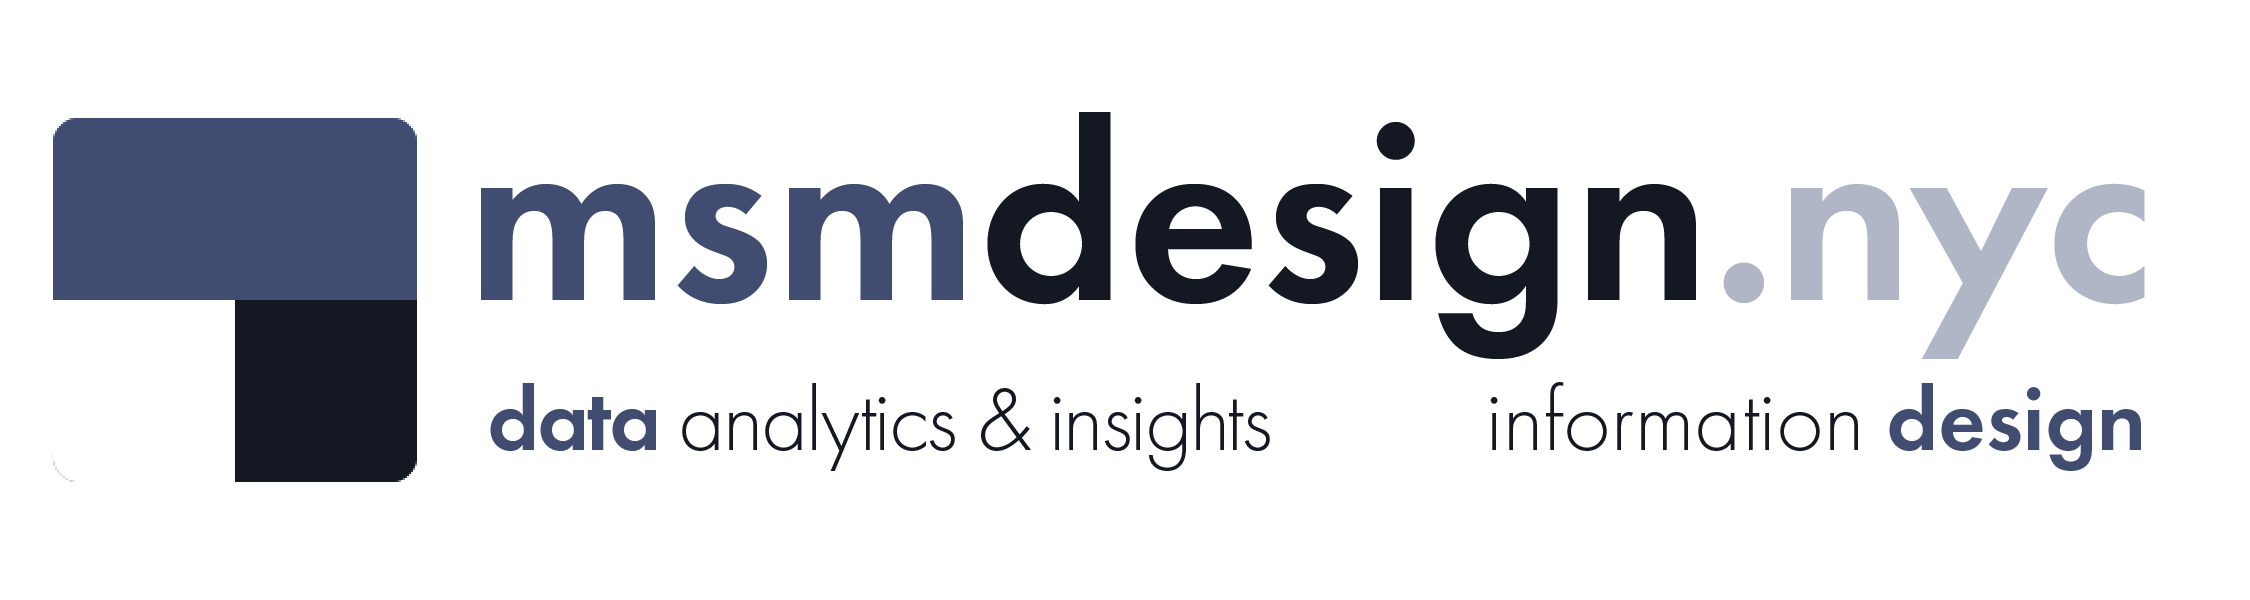

---
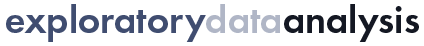

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# Youth Engagement by Category

**Dataset Analyzed:** *Youth Engagement by Category*

**About This Dataset:** CA (Cash Assistance) Heads of Household aged 18 to 24 by Engagement Category Data provided by the Human Resources Administration (HRA), the City of New York: https://data.cityofnewyork.us/City-Government/Youth-Engagement-By-Category/pqmq-sk82



**Acknowledgements:** NYC Open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-007


**EDA Publication Date:** Sunday, January 8, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [139]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='icefire',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [3]:
%%html
<style>
table {float:left}
</style>

### 0.4 Display all rows of output by default

In [4]:
pd.set_option('display.max_rows', None)

# to reset:
# pd.reset_option('display.max_rows')

### 0.5 Format large numbers and display floating point values to two decimal places

In [5]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

# to reset:
# pd.reset_option('display.float_format')

### 0.6 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [6]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-007\data\Youth_Engagement_By_Category.csv"

reports = pd.read_csv(csv, encoding='utf-8')

In [7]:
# glimpse the first three rows

reports.head(3)

,REPORT_DATE,AGE_GROUP,ENGAGEMENT_CATEGORY,CITYWIDE_COUNT
0,08/03/2018,16-17 Years,ACTIVE SINGLE ISSUE CASES,2
1,08/03/2018,16-17 Years,EMPLOYMENT-BUDGETED,19
2,08/03/2018,16-17 Years,EMPLOYMENT-NOT BUDGETED: NO AID TO CONTINUE,1


In [8]:
# glimpse the last three rows

reports.tail(3)

,REPORT_DATE,AGE_GROUP,ENGAGEMENT_CATEGORY,CITYWIDE_COUNT
6938,12/05/2022,21-24 Years,WECARE ASSESSMENT SCHEDULED/P,73
6939,12/05/2022,21-24 Years,WECARE VOCATIONAL REHABILITAT,71
6940,12/05/2022,21-24 Years,WELLNESS/REHAB PROGRAM,2


In [9]:
# glimpse ten randomly selected rows

reports.sample(10, random_state=72)

,REPORT_DATE,AGE_GROUP,ENGAGEMENT_CATEGORY,CITYWIDE_COUNT
1533,04/06/2020,21-24 Years,NOI ISSUED,14
2728,10/04/2021,21-24 Years,UNDERCARE AWAITING SCHEDULING,1194
966,09/04/2019,18-20 Years,SANCTION IN EFFECT,86
2810,12/06/2021,18-20 Years,EMPLOYMENT- GRANT DIVERSION,10
1457,03/04/2020,21-24 Years,NOI ISSUED,330
2530,07/06/2021,21-24 Years,SANCTION IN EFFECT,18
4519,12/04/2019,18-20 Years,CONCILIATION/CONFERENCE,114
2736,11/08/2021,16-17 Years,STUDENT OVER AGE 15,30
601,03/05/2019,21-24 Years,ACTIVE SINGLE ISSUE CASES,263
5567,02/04/2021,18-20 Years,EMPLOYMENT-NOT BUDGETED: NO AID TO CONTINUE,11


**The data has been loaded and has been read in as expected.**

### 0.7. Check the data type of each column

In [10]:
# display a listing of each of the DataFrame's columns and its data type

reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   REPORT_DATE          6941 non-null   object
 1   AGE_GROUP            6941 non-null   object
 2   ENGAGEMENT_CATEGORY  6941 non-null   object
 3   CITYWIDE_COUNT       6941 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 217.0+ KB


**The first three columns have been read in as *object* data type. We'll need to change the data type of some columns to a something more appropriate.**

### 0.8 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/pqmq-sk82/files/63cb2f78-a9c0-4c4b-a225-5d53e5190637?download=true&filename=Data_Dictionary_Youth_Engagement_by_Category.xlsx) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [13]:
# cast column(s) containing dates to datetime data type

reports['REPORT_DATE'] = pd.to_datetime(reports['REPORT_DATE'], errors='coerce')

In [15]:
# cast column(s) containing categorical varibles to categorical data type

reports['AGE_GROUP']           = reports['AGE_GROUP'].astype('category')
reports['ENGAGEMENT_CATEGORY'] = reports['ENGAGEMENT_CATEGORY'].astype('category')

In [16]:
# display the DataFrame info once again to confirm that the data type changes have been made

reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   REPORT_DATE          6941 non-null   datetime64[ns]
 1   AGE_GROUP            6941 non-null   category      
 2   ENGAGEMENT_CATEGORY  6941 non-null   category      
 3   CITYWIDE_COUNT       6941 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 123.7 KB


---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our dataset?

In [17]:
# display the number of rows and columns in the DataFrame

rows = reports.shape[0]
columns = reports.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 6941 rows and 4 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [18]:
# display the index of the DataFrame

reports.index

RangeIndex(start=0, stop=6941, step=1)

Our DataFrame has an interger index.

### 1.3 What are the column headings in our dataset?

In [19]:
# display a list of the DataFrame's columns

list(reports.columns)

['REPORT_DATE', 'AGE_GROUP', 'ENGAGEMENT_CATEGORY', 'CITYWIDE_COUNT']

### 1.4 What are the data types of each column?

In [20]:
# display the data type of each column in the DataFrame

reports.dtypes

REPORT_DATE            datetime64[ns]
AGE_GROUP                    category
ENGAGEMENT_CATEGORY          category
CITYWIDE_COUNT                  int64
dtype: object

### 1.5 How many null values are in each column?

In [21]:
# display the number of missing values in each column of the DataFrame

reports.isna().sum()

REPORT_DATE            0
AGE_GROUP              0
ENGAGEMENT_CATEGORY    0
CITYWIDE_COUNT         0
dtype: int64

### 1.6 How many unique values are there in each column?

In [22]:
# display the count of unique elements in each column

reports.nunique(axis=0, dropna=True)

REPORT_DATE             51
AGE_GROUP                3
ENGAGEMENT_CATEGORY     47
CITYWIDE_COUNT         661
dtype: int64

---

## **2. Briefly summarize the contents of the dataset**

### 2.1 Summarize the columns containing numerical variables

In [23]:
# describe numeric columns only

num_cols = ['CITYWIDE_COUNT']

reports[num_cols].describe(include=[np.number])

,CITYWIDE_COUNT
count,"6,941.00"
mean,181.04
std,569.15
min,1.00
25%,6.00
50%,28.00
75%,114.00
max,"12,961.00"


### 2.2 Summarize the columns containing datetime variables

In [24]:
# summarize the data contained in columns with the 'datetime' data type only

date_cols = ['REPORT_DATE']

reports[date_cols].describe(datetime_is_numeric=True) 

,REPORT_DATE
count,6941
mean,2020-08-06 20:05:09.119723520
min,2018-08-03 00:00:00
25%,2019-08-05 00:00:00
50%,2020-07-06 00:00:00
75%,2021-08-04 00:00:00
max,2022-12-05 00:00:00


### 2.3 Summarize the columns containing categorical variables

In [25]:
# summarize the data contained in columns with the 'category' data type only

reports.describe(include=['category'])

,AGE_GROUP,ENGAGEMENT_CATEGORY
count,6941,6941
unique,3,47
top,21-24 Years,EMPLOYMENT-BUDGETED
freq,3394,300


---

## 3. **Examine the individual variables in the dataset**

In [ ]:
### frequently used statistical functions ###

## measures of central tendency ##

#  .mean() - mean

#  .median() - median

#  .mode() - mode (the most common value in the data)


## measures of spread ##

#  .min() - min

#  .max() - max 

#  - range (the distance between the smallest value and the largest value)
### solve this later 

#  .var() - variance (the avg squared distance from the mean; describes how far apart observations are from their avg value)

#  .std() - standard deviation (describes how far from the mean data points are on average)

#  - coefficient of variation (unitless; ratio of standard deviation to the mean; used to compare mean-based spread across different datasets)
### solve this later 

#  - interquartile range (distance between the 3rd and 1st quartiles; used to measure spread based on median)
### solve this later 

#  - quartile coefficient of dispersion (unitless; used to compare median-based spread across different datasets)
### solve this later 

In [ ]:
### pandas built-in plots ###

# use the kind= parameter to specify the type of plot to create

# 'line' - line plot (default)

# 'bar' - vertical bar plot

# 'barh' - horizontal bar plot

# 'hist' - histogram

# 'box' - boxplot

# 'kde' - Kernal Density Estimation plot

# 'density' - same as 'kde'

# 'area' - area plot

# 'pie' - pie plot

# 'scatter' - scatter plot (DataFrame only)

# 'hexbin' - hexbin plot (DataFrame only)

In [ ]:
### examples of using plots to explore data ###

# plot data using aggregate functions
# df.mean().plot(kind='barh')


# plot data using value counts
# create a bar graph that shows how many of the businesses are located in each nyc borough
#df_socrata['establishment_record_establishment_borough'].value_counts().plot(kind='bar')

In [ ]:
### examples of single series analyses ###

# what is total number of complaints filed in 2022?
# cases2022['UNIQUE_KEY'].count()


# find the largest and smallest values in a numeric column
# DataFrame.nlargest(n, columns, keep='first')
# DataFrame.smallest(n, columns, keep='first')


# sort the data by one or more columns
# multi_sort = df.sort_values(by=['Age','Fare','Pclass'], ascending=[False,False,True])


# how many different types of complaints were filed in 2022?
# cases2022['COMPLAINT_TYPE'].nunique()


# display each different type of complaint that was filed in 2022
# complaints = pd.Series(cases2022['COMPLAINT_TYPE'].unique())
# complaints.sort_values(ignore_index=True)


# how many complaints of each type were filed?
# cases2022['COMPLAINT_TYPE'].value_counts()


# analyze nummeric columns usin value counts and buckets
# df['some_coluumn'].value_counts(bins=4)
# to display as percentages
# df['some_coluumn'].value_counts(bins=4, normalize=True)

# use dt to pull data by year (or month, etc.)
# inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.year).count()

### 3.1 What is the distribution of report dates?

In [28]:
# how many reports were filed on each day?

reports['REPORT_DATE'].value_counts(sort=False)

2018-08-03    162
2019-07-03    150
2018-09-05    162
2018-10-04    164
2018-12-04    162
2018-11-07    156
2019-01-03    164
2019-02-05    148
2019-03-05    150
2019-11-07    162
2019-04-03    154
2019-04-30    154
2019-08-05    156
2019-09-04    152
2019-10-04    156
2019-12-04    156
2020-01-07    148
2020-02-04    150
2020-03-04    148
2020-04-06    148
2020-05-05    138
2020-06-04    128
2020-07-06    128
2020-08-04    130
2020-09-04    128
2020-10-07    130
2020-11-04    130
2020-12-04    128
2021-01-05    132
2021-02-04    130
2021-03-04    130
2021-04-07    138
2021-05-05    138
2021-06-02    140
2021-07-06    134
2021-08-04    128
2021-09-07    132
2021-10-04    124
2021-11-08    126
2021-12-06    126
2022-02-03    126
2022-03-02    126
2022-04-05    126
2022-05-04    122
2022-06-03    126
2022-07-06    124
2022-10-04     65
2022-08-03    116
2022-09-06    114
2022-11-03    117
2022-12-05     59
Name: REPORT_DATE, dtype: int64

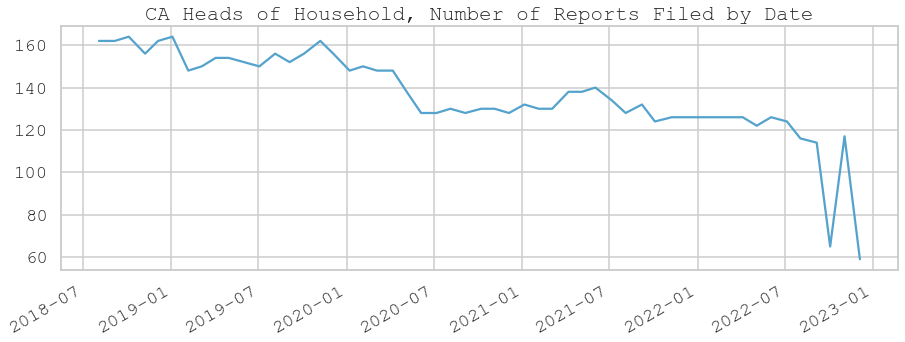

In [140]:
reports['REPORT_DATE'].value_counts(sort=False).plot(kind='line',
                                                     figsize=(15,5),
                                                     title="CA Heads of Household, Number of Reports Filed by Date");

In [35]:
# what is the range of dates represented in the dataset?

print(reports['REPORT_DATE'].min())
print('to')
print(reports['REPORT_DATE'].max())

2018-08-03 00:00:00
to
2022-12-05 00:00:00


In [37]:
# how many reports were file each year?

reports['REPORT_DATE'].groupby(reports['REPORT_DATE'].dt.year).count()

REPORT_DATE
2018     806
2019    1702
2020    1634
2021    1578
2022    1221
Name: REPORT_DATE, dtype: int64

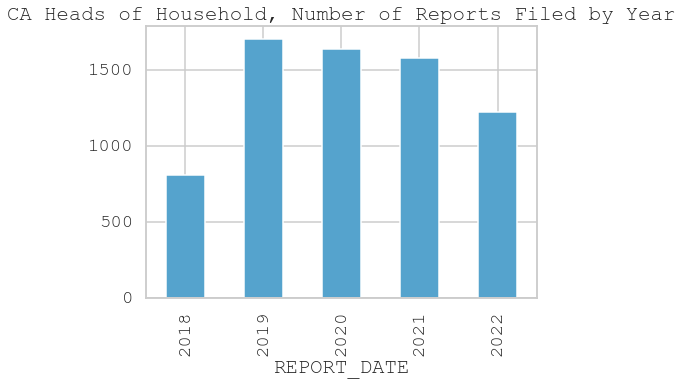

In [141]:
reports['REPORT_DATE'].groupby(reports['REPORT_DATE'].dt.year).count().plot(kind='bar',
                                                                            figsize=(7,5),
                                                                            title='CA Heads of Household, Number of Reports Filed by Year');

### 3.2 What is the distribution of​ age groups?

In [86]:
reports['AGE_GROUP'].value_counts(sort=False)

16-17 Years     504
18-20 Years    3043
21-24 Years    3394
Name: AGE_GROUP, dtype: int64

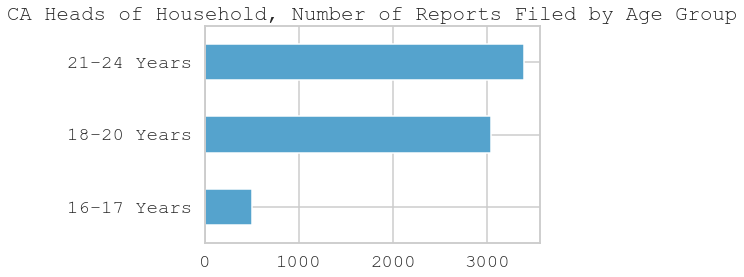

In [142]:
reports['AGE_GROUP'].value_counts(sort=False).plot(kind='barh',
                                                   title='CA Heads of Household, Number of Reports Filed by Age Group');

### 3.3 What is the distribution of engagement categories?

In [87]:
reports['ENGAGEMENT_CATEGORY'].value_counts()

EMPLOYMENT-BUDGETED                            300
DASIS CASES                                    278
ACTIVE SINGLE ISSUE CASES                      241
TEMPORARILY EXEMPT                             231
SUBSTANCE ABUSE RESIDENTIAL                    228
IN ENGAGEMENT REVIEW PROCESS                   228
STUDENT OVER AGE 15                            226
UNDERCARE AWAITING SCHEDULING                  221
UNENGAGED                                      212
CALL-IN APPOINTMENT SCHEDULED                  208
ASSIGNED JOB SEARCH                            206
EMPLOYMENT-NOT BUDGETED: NO AID TO CONTINUE    204
RECEIVING SSI                                  204
EDUCATION/TRAINING                             202
ELIGIBILITY CALL-IN APPT SCHD                  202
TEMP. INCAPACITATED - HEALTH                   200
WECARE ASSESSMENT SCHEDULED/P                  200
EMPLOYMENT- GRANT DIVERSION                    200
WECARE VOCATIONAL REHABILITAT                  200
SSI PENDING/APPEALING          

In [88]:
reports['ENGAGEMENT_CATEGORY'].value_counts(normalize=True)

EMPLOYMENT-BUDGETED                           0.04
DASIS CASES                                   0.04
ACTIVE SINGLE ISSUE CASES                     0.03
TEMPORARILY EXEMPT                            0.03
SUBSTANCE ABUSE RESIDENTIAL                   0.03
IN ENGAGEMENT REVIEW PROCESS                  0.03
STUDENT OVER AGE 15                           0.03
UNDERCARE AWAITING SCHEDULING                 0.03
UNENGAGED                                     0.03
CALL-IN APPOINTMENT SCHEDULED                 0.03
ASSIGNED JOB SEARCH                           0.03
EMPLOYMENT-NOT BUDGETED: NO AID TO CONTINUE   0.03
RECEIVING SSI                                 0.03
EDUCATION/TRAINING                            0.03
ELIGIBILITY CALL-IN APPT SCHD                 0.03
TEMP. INCAPACITATED - HEALTH                  0.03
WECARE ASSESSMENT SCHEDULED/P                 0.03
EMPLOYMENT- GRANT DIVERSION                   0.03
WECARE VOCATIONAL REHABILITAT                 0.03
SSI PENDING/APPEALING          

### 3.4 How many total cases are there for each category?

In [89]:
# total cases per year

reports['CITYWIDE_COUNT'].groupby(reports['REPORT_DATE'].dt.year).sum()

REPORT_DATE
2018    107056
2019    220030
2020    299052
2021    304314
2022    326152
Name: CITYWIDE_COUNT, dtype: int64

In [91]:
# total cases per age group

# total cases per year

reports['CITYWIDE_COUNT'].groupby(reports['AGE_GROUP']).sum()

AGE_GROUP
16-17 Years      4762
18-20 Years    262716
21-24 Years    989126
Name: CITYWIDE_COUNT, dtype: int64

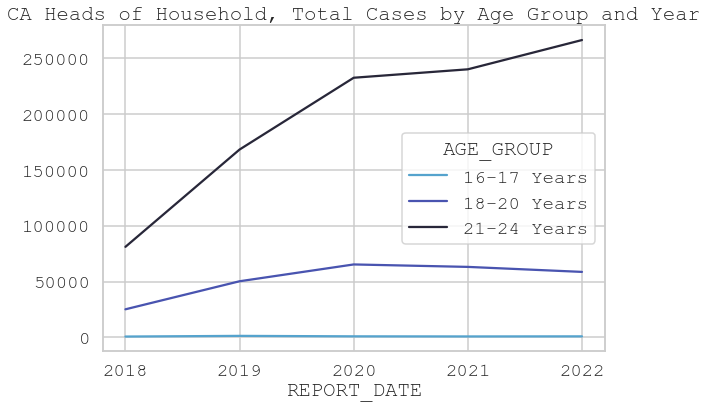

In [146]:
# total cases per year, per age group

reports['CITYWIDE_COUNT'].groupby([reports['AGE_GROUP'], reports['REPORT_DATE'].dt.year]).sum().unstack(level=0).plot(figsize=(9, 6),
                                                                                                                      title='CA Heads of Household, Total Cases by Age Group and Year');

In [155]:
# total cases per engagement category

reports['CITYWIDE_COUNT'].groupby(reports['ENGAGEMENT_CATEGORY']).sum().sort_values(ascending=False)

ENGAGEMENT_CATEGORY
IN ENGAGEMENT REVIEW PROCESS                   308507
ASSIGNED JOB SEARCH                            237751
UNDERCARE AWAITING SCHEDULING                   87059
EMPLOYMENT-BUDGETED                             83615
CALL-IN APPOINTMENT SCHEDULED                   83103
EDUCATION/TRAINING                              66981
WECARE ASSESSMENT SCHEDULED/P                   47183
DASIS CASES                                     46363
ACTIVE SINGLE ISSUE CASES                       26577
CONCILIATION/CONFERENCE                         25904
TEMPORARILY EXEMPT                              23375
PENDING WECARE SCHEDULING/OUT                   21506
TEMP. INCAPACITATED - HEALTH                    18438
STUDENT OVER AGE 15                             17389
EMPLOYMENT- GRANT DIVERSION                     16270
ALL_GR                                          15682
SANCTION IN EFFECT                              15354
EMPLOYMENT-NOT BUDGETED: NO AID TO CONTINUE     13622
NOI ISSU

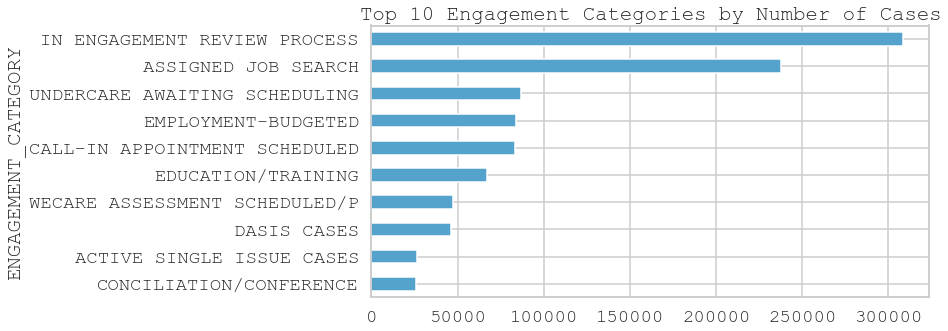

In [154]:
# display top ten categories only, plot

reports['CITYWIDE_COUNT'].groupby(reports['ENGAGEMENT_CATEGORY']).sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh',
                                                                                                                                figsize=(10,5),
                                                                                                                                 title='Top 10 Engagement Categories by Number of Cases');

---

## **Next steps**

In [168]:
# export data for data graphic creation

ca_engagements_by_category = reports['CITYWIDE_COUNT'].groupby(reports['ENGAGEMENT_CATEGORY']).sum().sort_values(ascending=False).head(10).sort_values(ascending=False)

In [169]:
ca_engagements_by_category.to_csv('ca_engagements_by_category.csv')

***

---